In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
附加信息

数据集由 10 个数值属性和 8 个分类属性组成。
“收入”属性可用作类标签。

“管理”、“管理持续时间”、“信息性”、“信息性持续时间”、“产品相关”和“产品相关持续时间”表示访问者在该会话中访问的不同类型的页面数量以及在每个页面类别中花费的总时间。这些功能的值来自用户访问的页面的URL信息，并在用户采取行动（例如从一个页面移动到另一个页面）时实时更新。“跳出率”、“退出率”和“页面价值”功能代表“Google Analytics”针对电子商务网站中每个页面测量的指标。网页的“跳出率”功能的值是指从该页面进入网站然后离开（“跳出”）的访问者的百分比，而不会在该会话期间触发对分析服务器的任何其他请求。特定网页的“退出率”功能值的计算方式为该网页的所有网页浏览量，即会话中最后一个网页浏览量的百分比。“页面价值”功能表示用户在完成电子商务交易之前访问的网页的平均值。“特殊日子”功能表示网站访问时间与特定特殊日子（例如母亲节、情人节）的接近程度，在该日子中，会话更有可能通过交易完成。此属性的值是通过考虑电子商务的动态（例如订单日期和交货日期之间的持续时间）来确定的。例如，对于瓦伦蒂娜节，此值在 2 月 12 日至 1 月 8 日之间采用非零值，在此日期之前和之后为零，除非接近另一个特殊日子，并且在 <> 月 <> 日采用最大值 <>。该数据集还包括操作系统、浏览器、区域、流量类型、作为回访者或新访客的访客类型、指示访问日期是周末还是一年中的月份的布尔值。
'''

In [9]:
filepath = '../data/onlineShop/online_shoppers_intention.csv'
data_df = pd.read_csv(filepath,sep=",")

In [10]:
print("="*50,'数据大小',"="*50)
print(data_df.shape)
print("="*50,'数据基本格式',"="*50)
print(data_df.describe())
print("="*50,f'数据前{5}项',"="*50)
print(data_df.head(5))
print("="*50,'各列数据类型',"="*50)
print(data_df.dtypes)

================================================== 数据大小 ==================================================
(12330, 18)
================================================== 数据基本格式 ==================================================
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31

In [ ]:
'''
Administrative            管理的
Administrative_Duration   管理持续时间
Informational             信息性
Informational_Duration    信息_持续时间
ProductRelated            产品相关
ProductRelated_Duration   产品相关持续时间
BounceRates               反弹率
ExitRates                 退出率
PageValues                页面值
SpecialDay                特惠日
Month                     月
OperatingSystems          操作系统
Browser                   浏览器
Region                    区域
TrafficType               流量类型
VisitorType               访问者类型
Weekend                   周末
Revenue                   收入
'''

In [12]:
print("="*50,'各列是否存在空值',"="*50)
data_df.isna

================================================== 各列是否存在空值 ==================================================


<bound method DataFrame.isna of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0          

In [16]:
# 最大one-hot大小
MaxCountNum = 60
data_df_counts = []
onehotDataName = []
for k in data_df.keys():
    data_df_counts.append([k,data_df[k].value_counts()])
    if len(data_df[k].value_counts()) < MaxCountNum:
        onehotDataName.append([k,data_df[k].value_counts()])
        # 符合onehot条件的标签
        # print(k)
# print(onehotDataName)
# print([[i[0],len(i[1])] for i in data_df_counts])
print([i[1].keys for i in onehotDataName])
# print([i[1].values for i in onehotDataName])

[<bound method Series.keys of Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64>, <bound method Series.keys of Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: count, dtype: int64>, <bound method Series.keys of SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64>, <bound method Series.keys of Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64>, <bound method Series.keys of Oper

In [17]:
def pltbar(x,y):
    plt.bar(x,y)
    plt.xticks(range(len(x)),x)
    plt.show()
    
def pltpoint(x,y):
    plt.scatter(x,y)
    plt.show()
    
def pltpie(x, lable = None):
    explode = [(i+1)/len(x)*1 for i in range(len(x))]
    plt.pie(x,labels=lable,autopct="%0.2f%%",pctdistance = 0.6,explode=explode)
    plt.show()

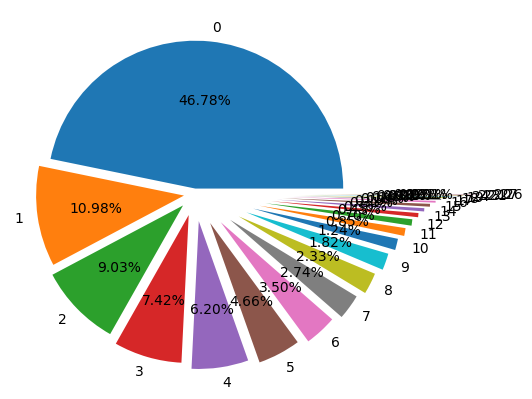

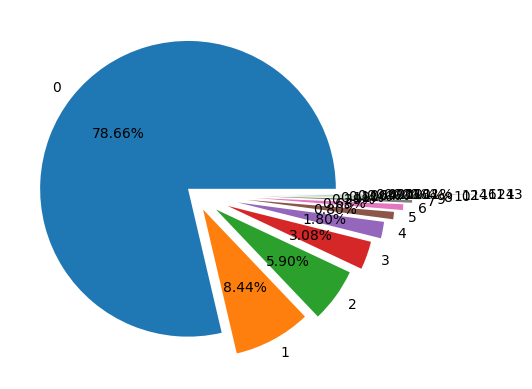

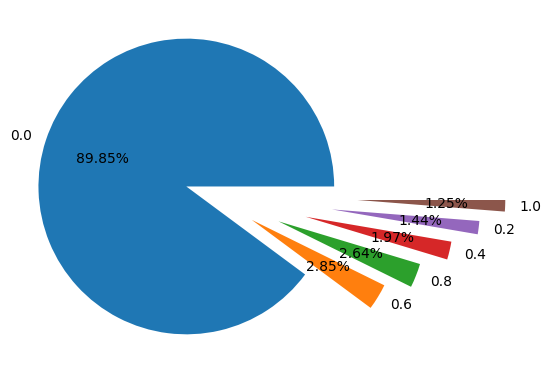

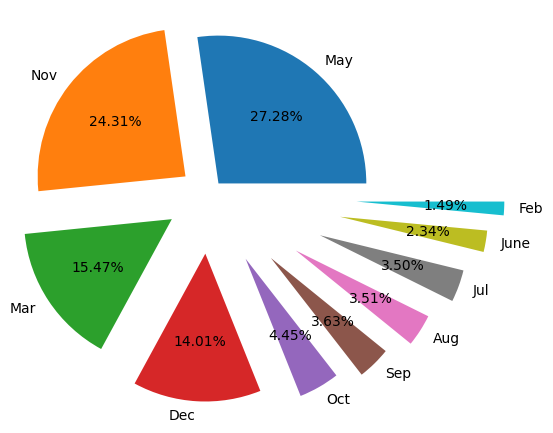

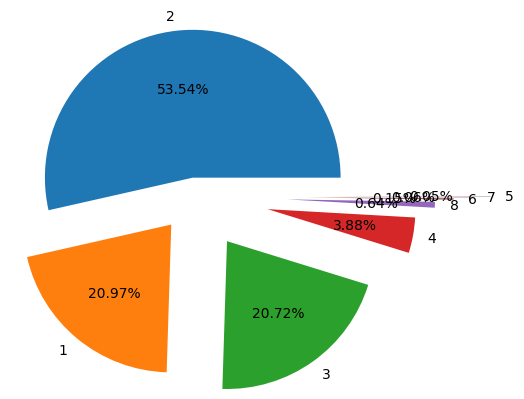

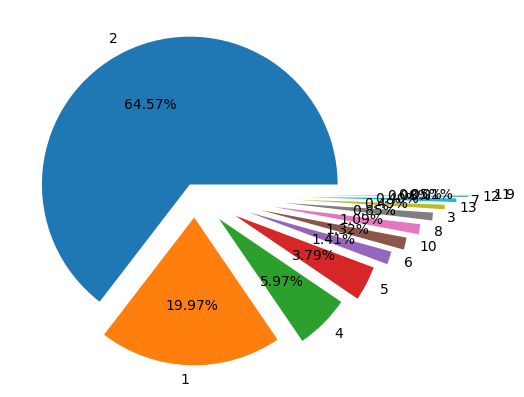

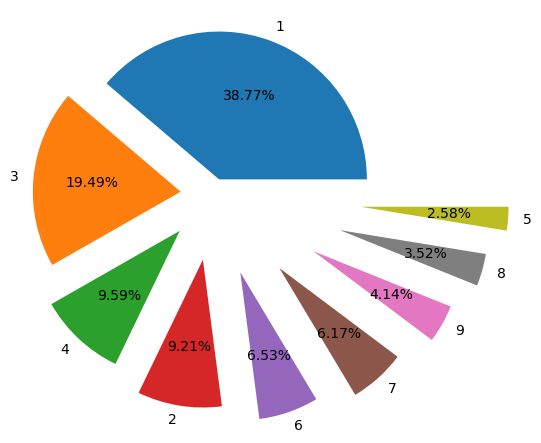

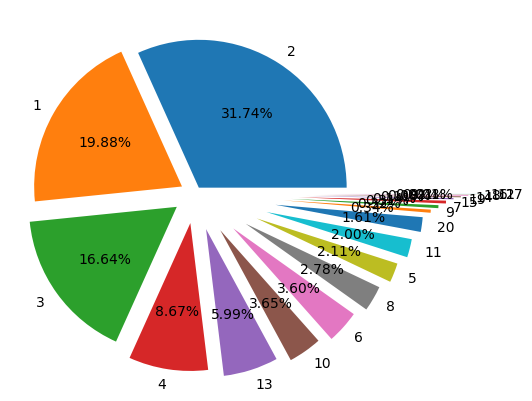

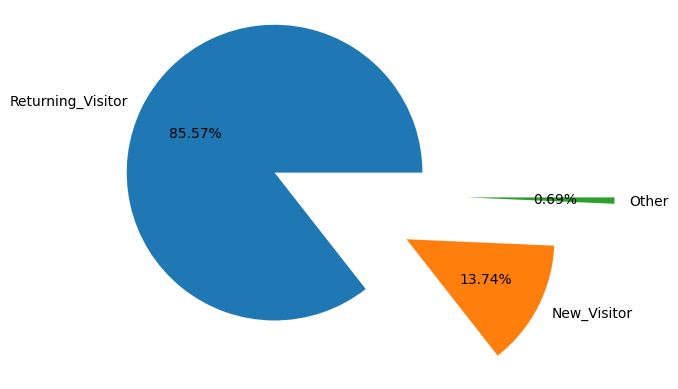

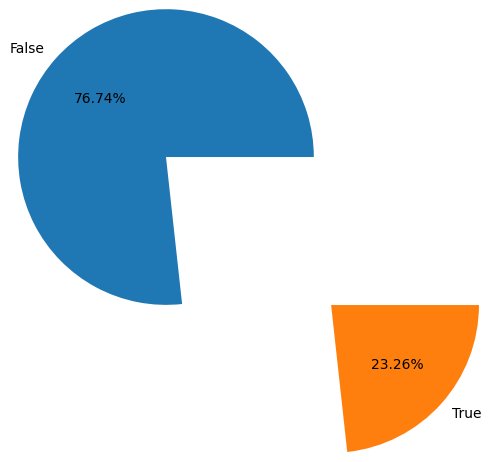

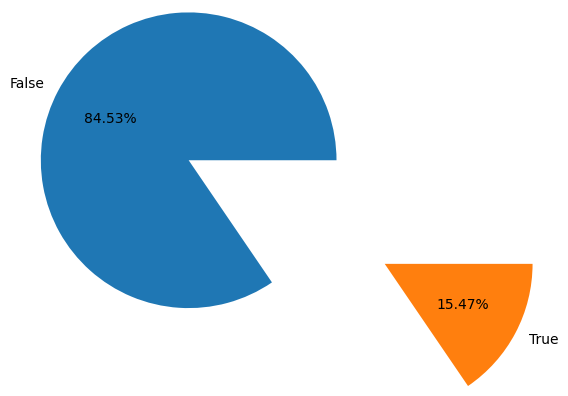

In [18]:
# 类型少的数据分布
for k in data_df.keys():
    data_df_counts.append([k,data_df[k].value_counts()])
    if len(data_df[k].value_counts()) < MaxCountNum:
        mes_k_count = data_df[k].value_counts()
        x = mes_k_count.index.values
        y = mes_k_count.values
        # print(x,'\n',y)
        pltpie(y,lable = x)
        

In [ ]:
# 数据与分类的相关性
datalist = data_df_counts[-1]
